In [1]:
import ast
import bs4
import time
import json
import requests
import pandas as pd
import scipy as scipy
import numpy as np
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_df.csv')

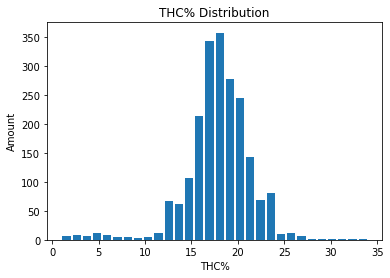

In [3]:
df['THC'].hist(bins=30,rwidth=0.8,grid=False)
plt.xlabel('THC%')
plt.ylabel('Amount')
plt.title('THC% Distribution')
plt.show()

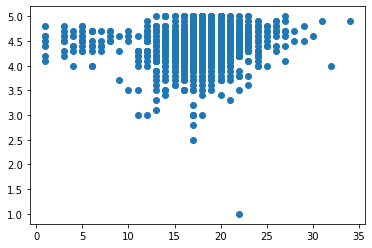

In [4]:
fig = plt.figure()
ax =plt.axes()


ax.scatter(df.THC,df.Rating)
# ax.scatter(df.Rating,df.THC)
# ax.scatter(df.CBD,df.Rating,c='red')
plt.show()

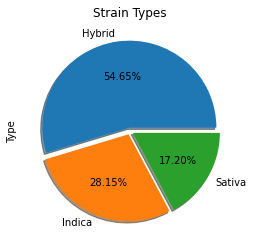

In [5]:
most_freq1 = df['Type'].value_counts()
explode = (0.04, 0.04, 0.04)
most_freq1.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode)
plt.title('Strain Types')
plt.show()


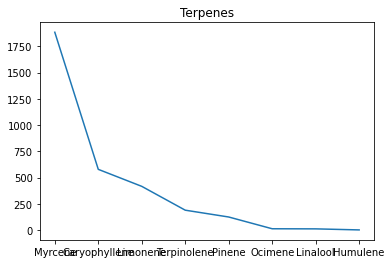

In [64]:
most_freq1 = df['Top Terpene'].value_counts()
most_freq1.plot(kind='line')
plt.title('Terpenes')
plt.show()


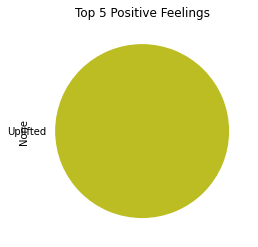

In [6]:

most_freq1 = df['Feeling_1'].value_counts()[:5].sort_index(ascending=True)
most_freq2 = df['Feeling_2'].value_counts()[:5].sort_index(ascending=True)
most_freq3 = df['Feeling_3'].value_counts()[:5].sort_index(ascending=True)
most_freq4 = df['Feeling_4'].value_counts()[:5].sort_index(ascending=True)
most_freq5 = df['Feeling_5'].value_counts()[:5].sort_index(ascending=True)


freq = most_freq1 + most_freq2 + most_freq3 + most_freq4 + most_freq5


freq.plot(kind='pie')
plt.title('Top 5 Positive Feelings')
plt.show()

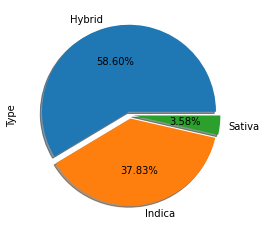

In [58]:
most_freq1 = df['Feeling_1'].value_counts()[:5].sort_index(ascending=True)
most_freq2 = df['Feeling_2'].value_counts()[:5].sort_index(ascending=True)
most_freq3 = df['Feeling_3'].value_counts()[:5].sort_index(ascending=True)
most_freq4 = df['Feeling_4'].value_counts()[:5].sort_index(ascending=True)
most_freq5 = df['Feeling_5'].value_counts()[:5].sort_index(ascending=True)


curr_df = df[(df['Feeling_1'] == 'Hungry') | (df['Feeling_2'] == 'Hungry') | (df['Feeling_3'] == 'Hungry') | (df['Feeling_4'] == 'Hungry') | (df['Feeling_5'] == 'Hungry')]
# curr_df = df[(df['Negative_1'] == 'Dry eyes') | (df['Negative_2'] == 'Dry eyes') | (df['Negative_3'] == 'Dry eyes') | (df['Negative_4'] == 'Dry eyes') | (df['Negative_5'] == 'Dry eyes')]

curr_df = curr_df['Type'].value_counts()

explode = (0.04, 0.04, 0.04)
curr_df.plot(kind='pie',autopct='%1.2f%%',shadow=True,explode=explode)
# plt.title('Top 5 Positive Feelings')
plt.show()


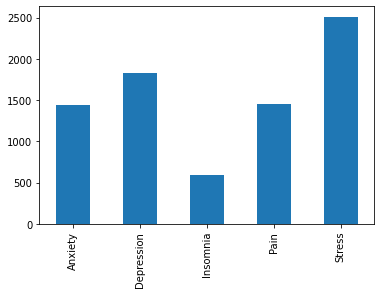

In [7]:
## Top health conditions

most_freq1 = df['Helps with_1'].value_counts()[:5].sort_index(ascending=True)
most_freq2 = df['Helps with_2'].value_counts()[:5].sort_index(ascending=True)
most_freq3 = df['Helps with_3'].value_counts()[:5].sort_index(ascending=True)


freq = most_freq1 + most_freq2 + most_freq3


freq.plot(kind='bar')
plt.show()